# Linear Regression Course

Linear Regression: Realized regression, including the definition of linear function, why use linear function, the meaning of loss, the meaning of gradient descent, stochastic gradient descent.

Use Boston house Price Dataset.

Boston: room size, subway, highway, crime rate, there is a more obvious relationship, so it is easier to observe the relationship

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

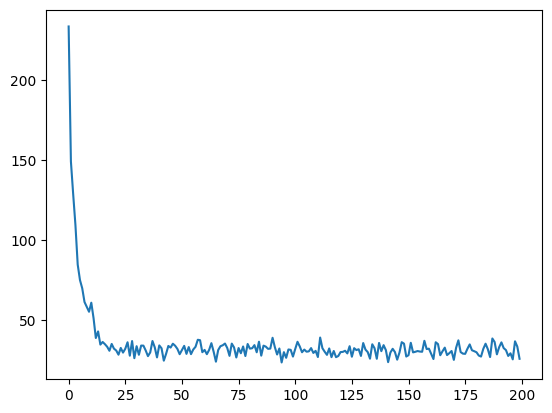

In [17]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import seaborn as sns
import matplotlib.pyplot as plt

# ======> self description



dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

df = pd.DataFrame(data)
df.columns = columns
df['price'] = target

print(df.corr()) # show the correlation of dataframe variables

# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(df.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = df['RM']
lstat = df['LSTAT']

def linear(x, w, b):
    # vectorized model
    return np.dot(x, w.T) + b


def loss(yhat, y):
    # numpy broadcast
    return np.mean((yhat - y ) ** 2)

def partial_w(x, y, yhat):
    return np.array([2 * np.mean((yhat - y) * x[0]), 2 * np.mean((yhat - y) * x[1])])

def partial_b(x, y, yhat):
    return 2 * np.mean((yhat - y))

def optimize(w, b, x, y, yhat, pw, pb, learning_rate):
    w = w + -1 * pw(x, y, yhat) * learning_rate
    b = b + -1 * pb(x, y, yhat) * learning_rate

    return w, b


def train(model_to_be_train, target, loss, pw, pd):
    w = np.random.random_sample((1, 2)) # w normal
    b = np.random.random() # 0
    learning_rate = 1e-5
    epoch = 200
    losses = []

    for i in range(epoch):
        batch_loss = []

        for batch in range(len(rm)):
            # batch training
            index = random.choice(range(len(rm)))
            rm_x, lstat_x = rm[index], lstat[index]
            x = np.array([rm_x, lstat_x])
            y = target[index]

            yhat = model_to_be_train(x, w, b)
            loss_v = loss(yhat, y)

            batch_loss.append(loss_v)

            w, b = optimize(w, b, x, y, yhat, pw, pd, learning_rate)

            if batch % 100 == 0:
                print('Epoch: {} Batch: {}, loss: {}'.format(i, batch, loss_v))
        losses.append(np.mean(batch_loss))

    return model_to_be_train, w, b, losses


if __name__ == "__main__":
    import matplotlib.pyplot as plt

    target = df['price']

    model, w, b, losses = train(linear, target, loss, partial_w, partial_b)
    plt.plot(losses)
    predicate = model(np.array([19, 7]), w, b)
    print(predicate)

    plt.show()



# Logstic Regression Course

In [28]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

df = pd.DataFrame(data)
df.columns = columns
df['price'] = target

# print(df.corr()) # show the correlation of dataframe veriables

# sns.heatmap(df.corr())
# plt.show()

# RM: Average number of bedrooms in the community
# LSTAT: Percentage of low-income people around

rm = df['RM']
lstat = df['LSTAT']
price = df['price']
greater_then_most = np.percentile(price, 66)
greater_then_most
df['expensive'] = df['price'].apply(lambda p:int(p > greater_then_most))
target = df['expensive']

print(df[:20])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def model(x, w, b):
    return sigmoid(np.dot(x, w.T) + b)

def loss(yhat, y):
    return -np.sum(y*np.log(yhat) + (1-y)*np.log(1-yhat))

def partial_x(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum(yhat - y) * x[1]])

def partial_b(x, y, yhat):
    return np.sum(yhat - y)

model, w, b, losses = train(model, target, loss, partial_w, partial_b)

random_test_indices = np.random.choice(range(len(rm)), size = 100)
decision_boundary = 0.5

for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], target[i]
    predicate = model(np.array([x1, x2]), w, b)
    predicate_label = int(predicate > decision_boundary)

    print('RM: {}, LSTAT: {}, EXPENSIVE: {}, Predicated: {}'.format(x1, x2, y, predicate_label))













       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 